In [ ]:
import pandas as pd
import plotly.express as px
import plotly.data as pld

[Plotly Express documentation](https://plotly.com/python-api-reference/plotly.express.html)

# Tips

In [ ]:
tips = pld.tips()
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Looking at this data what questions can we ask to ourselves that this data can answer?

- what is the portion of female visitors to the portions of male visitors?
- what is the sum of total bill for each day
- what is the sum of total bill for each time
- what is the relation between total bill and tips
- what is the total bill per gender for each day

In [ ]:
px.pie(tips, names='sex', title='Female vs. Male visitors')

In [ ]:
px.bar(tips, x='day', y='total_bill', title='Total bill per day')

In [ ]:
px.bar(
    tips.groupby('day', as_index=False).sum(),
    x='day',
    y='total_bill',
    title='Total bill per day smoothed'
)

In [ ]:
px.bar(
    tips.groupby('day', as_index=False).sum(), 
    x='day', 
    y=['total_bill', 'tip'],
    title='Total bill vs. Tip per day'
    )

In [ ]:
px.scatter(tips, x='total_bill', y='tip', title='Total bill vs. Tip')

In [ ]:
px.sunburst(tips, path=['day', 'sex'], values='total_bill', title='Gender Total bill per day')

In [ ]:
fig = px.sunburst(tips, path=['time', 'sex'], values='tip', title='Gender Total tip per time of day')
fig.update_traces(textinfo="label+percent parent")
fig.show()

# Stocks

In [ ]:
stocks = pld.stocks()
stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


Looking at this data what questions can we ask to ourselves that this data can answer?

- What is the proportion of stocks values per day for each company
- What is the stocks trend per company

In [ ]:
px.area(stocks, y=['GOOG', 'AAPL', 'AMZN'], x='date', title='Stocks proportion vs. Date')

In [ ]:
stocks = stocks.melt(id_vars=['date'], var_name='company', value_name='stock')
stocks.head()

,date,company,stock
0,2018-01-01,GOOG,1.000000
1,2018-01-08,GOOG,1.018172
2,2018-01-15,GOOG,1.032008
3,2018-01-22,GOOG,1.066783
4,2018-01-29,GOOG,1.008773


In [ ]:
line_fig = px.line(
    stocks,
    x='date',
    y='stock',
    color='company',
    title='Stock value vs. date',
)
company_names = {
    'GOOG':'Google',
    'AAPL': 'Apple',
    'AMZN': 'Amazon',
    'FB': 'Facebook',
    'NFLX': 'Netflix',
    'MSFT': 'Microsoft'
}
line_fig.for_each_trace(
    lambda trace: trace.update(
        name = company_names[trace.name], 
        legendgroup = company_names[trace.name],
        hovertemplate = trace.hovertemplate.replace(trace.name, company_names[trace.name])
        )
    )
line_fig.show()

# Gapminder

In [ ]:
gapminder = pld.gapminder()
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


Looking at this data what questions can we ask to ourselves that this data can answer?

- What is the GPD per Cap for each country in each year
- What is the relation between GDP and life expectancy

In [ ]:
gdpPercap_min = gapminder['gdpPercap'].min()
gdpPercap_max = gapminder['gdpPercap'].max()
px.choropleth(
    gapminder, 
    title='GDP per Country',
    locations='iso_alpha', 
    color='gdpPercap', 
    animation_frame='year', 
    range_color=[gdpPercap_min, gdpPercap_max]
)

In [ ]:
lifeExp_min = gapminder['lifeExp'].min()
lifeExp_max = gapminder['lifeExp'].max()
px.scatter(
    gapminder,
    x='gdpPercap',
    y='lifeExp', 
    color='continent', 
    hover_name='country', 
    # size_max=60,
    log_x=True, 
    size='pop',
    # title='GDP vs life expectency',
    # # trendline='ols',
    symbol='continent',
    range_x=[gdpPercap_min, gdpPercap_max],
    range_y=[lifeExp_min, lifeExp_max],
    animation_frame='year',
)

# Dash
[Dash Documentation](https://dash.plotly.com/)

In web design world there is CSS framework that is the most used for design.

That framework is **bootstrap**, bootstrap divides the web page to 12 column that can be combined

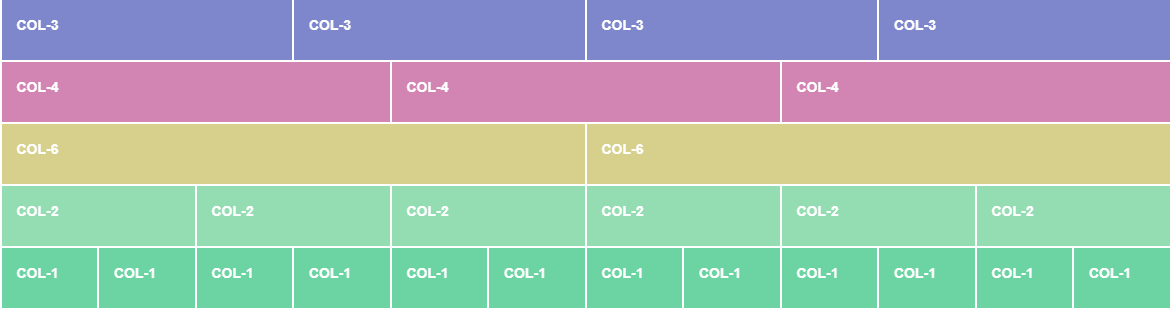

**Dash** is a dhasboard framework to build dashboards using HTML and CSS

In [ ]:
!pip install -q dash dash_bootstrap_components jupyter_dash

     |████████████████████████████████| 9.8 MB 22.8 MB/s 
     |████████████████████████████████| 216 kB 49.9 MB/s 
     |████████████████████████████████| 357 kB 50.0 MB/s 


In [ ]:
from dash import Dash, dcc, html
import dash_bootstrap_components as dbc
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output, State

## Prepare Graph

In [ ]:
tips = pld.tips()

sex_pie = px.pie(tips, names='sex', title='Female vs. Male visitors')

total_bill_per_day_bar = px.bar(
    tips.groupby('day', as_index=False).sum(),
    x='day',
    y='total_bill',
    title='Total bill per day smoothed'
)

total_bil_tip_bar = px.bar(
    tips.groupby('day', as_index=False).sum(), 
    x='day', 
    y=['total_bill', 'tip'],
    title='Total bill vs. Tip per day'
)

total_bill_tip_scatter = px.scatter(tips, x='total_bill', y='tip', title='Total bill vs. Tip')

day_sex_total_bill_sunburst = px.sunburst(tips, path=['day', 'sex'], values='total_bill', title='Gender Total bill per day')
day_sex_total_bill_sunburst = day_sex_total_bill_sunburst.update_traces(textinfo="label+percent parent")

time_sex_tip_sunburst = px.sunburst(tips, path=['time', 'sex'], values='tip', title='Gender Total tip per time of day')
time_sex_tip_sunburst = time_sex_tip_sunburst.update_traces(textinfo="label+percent parent")


In [ ]:
sizes = tips['size'].unique()
sizes

array([2, 3, 4, 1, 6, 5])

## Build Components

In [ ]:
sex_pie_fig = dcc.Graph(
    id='sex_pie_fig',
    figure=sex_pie
)
total_bill_per_day_bar_fig = dcc.Graph(
    id='total_bill_per_day_bar_fig',
    figure=total_bill_per_day_bar
)
total_bil_tip_bar_fig = dcc.Graph(
    id='total_bil_tip_bar_fig',
    figure=total_bil_tip_bar
)
total_bill_tip_scatter_fig = dcc.Graph(
    id='total_bill_tip_scatter_fig',
    figure=total_bill_tip_scatter
)
day_sex_total_bill_sunburst_fig = dcc.Graph(
    id='day_sex_total_bill_sunburst_fig',
    figure=day_sex_total_bill_sunburst
)
time_sex_tip_sunburst_fig = dcc.Graph(
    id='time_sex_tip_sunburst_fig',
    figure=time_sex_tip_sunburst
)

size_selector = dcc.Dropdown(
    id='size_selector',
    options=sizes,
    multi=True,
    value=[],
    placeholder='Filter by group size'
)

app = JupyterDash('Basic Dash Dashboard', 
                  external_stylesheets=[dbc.themes.BOOTSTRAP], 
                  title="Plotly Tips Dashboard"
)

app.layout = dbc.Container(
    [
     dbc.Row(
         [
          dbc.Col(html.H1('Tips Dashboard Analysis'))
         ]
     ),
     dbc.Row(
         [
          dbc.Row(
              [
               dbc.Col(size_selector)
              ],
              className='my-2'
          ),
          dbc.Row(
              [
               dbc.Col(dbc.Card(total_bill_tip_scatter_fig), md=8),
               dbc.Col(dbc.Card(sex_pie_fig), md=4),
              ]
          )
         ],
         className='my-3'
     ),
     dbc.Row(
         [
          dbc.Col(dbc.Card(time_sex_tip_sunburst_fig), md=4),
          dbc.Col(dbc.Card(total_bill_per_day_bar_fig), md=8),
         ]
     ),
     dbc.Row(
         [
          dbc.Col(dbc.Card(total_bil_tip_bar_fig), md=8),
          dbc.Col(dbc.Card(day_sex_total_bill_sunburst_fig), md=4),
         ],
         className='my-3'
     )
    ]
)
@app.callback(
    [
     Output('sex_pie_fig', 'figure'),
     Output('time_sex_tip_sunburst_fig', 'figure'),
     Output('day_sex_total_bill_sunburst_fig', 'figure'),
    ],
    Input('size_selector', 'value'),
)
def update_pies(selected_sizes):
    if selected_sizes == None or len(selected_sizes) == 0:
        return [sex_pie, time_sex_tip_sunburst, day_sex_total_bill_sunburst]
    

    filtered_tips = tips[tips['size'].isin(selected_sizes)]

    new_sex_pie = px.pie(filtered_tips, names='sex', title='Female vs. Male visitors')
    
    new_time_sex_tip_sunburst = px.sunburst(filtered_tips, path=['time', 'sex'], values='tip', title='Gender Total tip per time of day')
    new_time_sex_tip_sunburst = new_time_sex_tip_sunburst.update_traces(textinfo="label+percent parent")

    new_day_sex_total_bill_sunburst = px.sunburst(filtered_tips, path=['day', 'sex'], values='total_bill', title='Gender Total bill per day')
    new_day_sex_total_bill_sunburst = new_day_sex_total_bill_sunburst.update_traces(textinfo="label+percent parent")

    return [new_sex_pie, new_time_sex_tip_sunburst, new_day_sex_total_bill_sunburst]

app.run_server(debug=True)

Dash app running on:


<IPython.core.display.Javascript object>